In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dfReceiving = pd.read_csv('./NFL_Data/2019/2019_NFL_Receiving.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

In [17]:
player_columns = ['Player', 'Tm', 'Age', 'Pos', 'G', 'GS']
receiving_columns = ['Tgt', 'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb']

In [4]:
pointsPerRec = 1
pointsPerPassingTD = 4
pointsPerRushingTD = 4
pointsPerReceivingTD = 4
pointsPerRushingYD = 0.1
pointsPerReceivingYd = 0.1
pointsPerPassingYd = 0.04
pointsPerFumble = -2
pointsPerINT = -2

In [5]:
dfReceiving['ReceivingFPs'] = dfReceiving['Yds'] * pointsPerReceivingYd + dfReceiving['Rec'] * pointsPerRec + dfReceiving['TD'] * pointsPerReceivingTD + dfReceiving['Fmb'] * pointsPerFumble

In [6]:
qb_receiving_df = dfReceiving[dfReceiving['Pos'] == 'QB']
rb_receiving_df = dfReceiving[dfReceiving['Pos'] == 'RB']
k_receiving_df = dfReceiving[dfReceiving['Pos'] == 'K']
wr_receiving_df = dfReceiving[dfReceiving['Pos'] == 'WR']

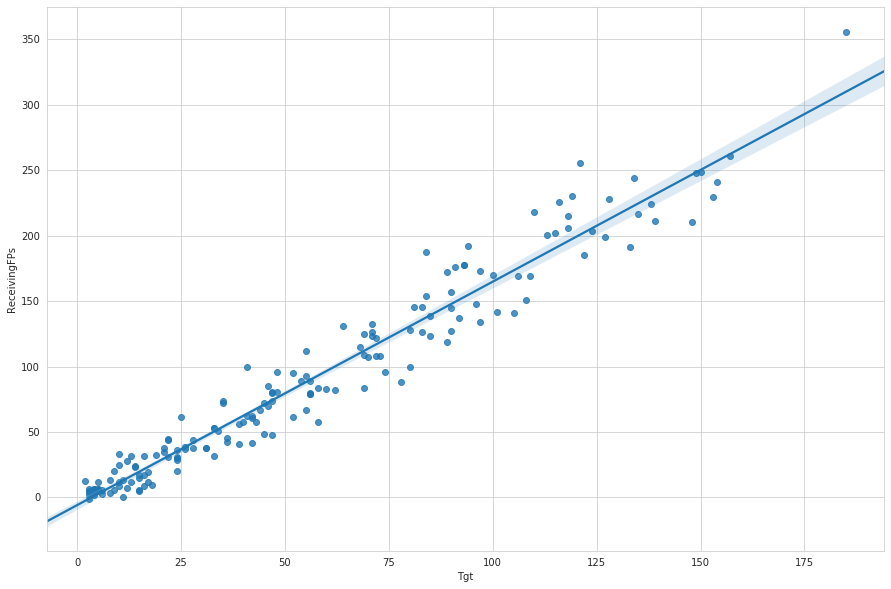

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(
        x = wr_receiving_df['Tgt'],
        y = wr_receiving_df['ReceivingFPs'],
        scatter=True,)

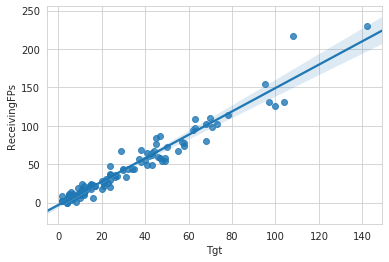

In [8]:
plot = sns.regplot(
        x = rb_receiving_df['Tgt'],
        y = rb_receiving_df['ReceivingFPs'],
        scatter=True,)

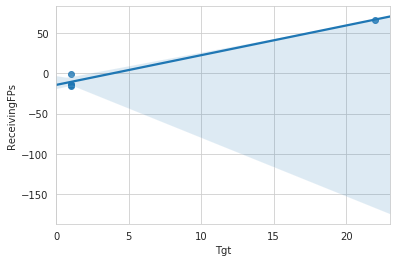

In [9]:
plot = sns.regplot(
        x = qb_receiving_df['Tgt'],
        y = qb_receiving_df['ReceivingFPs'],
        scatter=True,)

In [10]:
import statsmodels.api as sm

In [11]:
print(wr_receiving_df.columns.tolist())

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb', 'ReceivingFPs']


In [19]:
X = wr_receiving_df[receiving_columns]
XTgt = wr_receiving_df["Tgt"]
XRec = wr_receiving_df["Rec"]
XYds = wr_receiving_df["Yds"]
XTD = wr_receiving_df["TD"]
XFmb = wr_receiving_df["Fmb"]

X = X.apply(pd.to_numeric)
XTgt = XTgt.apply(pd.to_numeric)
XRec = XRec.apply(pd.to_numeric)
XYds = XYds.apply(pd.to_numeric)
XTD = XTD.apply(pd.to_numeric)
XFmb = XFmb.apply(pd.to_numeric)

In [20]:
Y = wr_receiving_df["ReceivingFPs"]

In [21]:
modelA = sm.OLS(Y, X).fit()

predictions = modelA.predict(X)

modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.686e+31
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                        0.00
Time:                        14:21:01   Log-Likelihood:                          4833.2
No. Observations:                 170   AIC:                                     -9644.
Df Residuals:                     159   BIC:                                     -9610.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tgt         -2.22e-15   1.48e-15     -1.498      0.136   -5.15e-15    7.06e-16
Rec            1.0000   3.27e-15   3.06e+14      0.000       1.000       1.000
Yds            0.1000   2.36e-16   4.23e+14      0.000       0.100       0.100
Y/R         4.885e-15   3.51e-15      1.392      0.166   -2.05e-15    1.18e-14
TD             4.0000   6.24e-15   6.41e+14      0.000       4.000       4.000
1D         -1.332e-15   3.16e-15     -0.422      0.674   -7.57e-15    4.91e-15
Lng        -9.021e-17   7.71e-16     -0.117      0.907   -1.61e-15    1.43e-15
Y/Tgt      -5.551e-15   5.22e-15     -1.063      0.289   -1.59e-14    4.76e-15
R/G                 0   3.43e-14          0      1.000   -6.76e-14    6.76e-14
Y/G          2.22e-16   2.68e-15      0.083      0.934   -5.07e-15    5.52e-15
Fmb           -2.0000   9.44e-15  -2.12e+14      0.000      -2.000      -2.000
==============================================================================
Omnibus:                       68.977   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.230
Skew:                          -1.631   Prob(JB):                     2.48e-48
Kurtosis:                       7.507   Cond. No.                     2.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
modelTgt = sm.OLS(Y, XTgt).fit()

predictions = modelTgt.predict(XTgt)

modelTgt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              7997.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                   3.06e-144
Time:                        14:21:03   Log-Likelihood:                         -721.90
No. Observations:                 170   AIC:                                      1446.
Df Residuals:                     169   BIC:                                      1449.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tgt            1.6407      0.018     89.423      0.000       1.605       1.677
==============================================================================
Omnibus:                       18.977   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.720
Skew:                           0.718   Prob(JB):                     7.07e-06
Kurtosis:                       4.134   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
modelRec = sm.OLS(Y, XRec).fit()

predictions = modelRec.predict(XRec)

modelRec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              9355.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                   6.89e-150
Time:                        14:21:05   Log-Likelihood:                         -708.82
No. Observations:                 170   AIC:                                      1420.
Df Residuals:                     169   BIC:                                      1423.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rec            2.5884      0.027     96.720      0.000       2.536       2.641
==============================================================================
Omnibus:                       17.513   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.564
Skew:                           0.652   Prob(JB):                     1.26e-05
Kurtosis:                       4.220   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
modelYds = sm.OLS(Y, XYds).fit()

predictions = modelYds.predict(XYds)

modelYds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.619e+04
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                   3.02e-187
Time:                        14:21:13   Log-Likelihood:                         -622.30
No. Observations:                 170   AIC:                                      1247.
Df Residuals:                     169   BIC:                                      1250.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds            0.1963      0.001    161.827      0.000       0.194       0.199
==============================================================================
Omnibus:                       13.239   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.652
Skew:                          -0.388   Prob(JB):                     1.21e-05
Kurtosis:                       4.611   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
modelTD = sm.OLS(Y, XTD).fit()

predictions = modelTD.predict(XTD)

modelTD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              1244.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    7.75e-80
Time:                        14:21:14   Log-Likelihood:                         -871.02
No. Observations:                 170   AIC:                                      1744.
Df Residuals:                     169   BIC:                                      1747.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TD            28.5047      0.808     35.267      0.000      26.909      30.100
==============================================================================
Omnibus:                        5.605   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.643
Skew:                           0.224   Prob(JB):                       0.0361
Kurtosis:                       3.859   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelFmb = sm.OLS(Y, XFmb).fit()

predictions = modelFmb.predict(XFmb)

modelFmb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ReceivingFPs   R-squared (uncentered):                   0.239
Model:                            OLS   Adj. R-squared (uncentered):              0.234
Method:                 Least Squares   F-statistic:                              53.04
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    1.18e-11
Time:                        14:21:15   Log-Likelihood:                         -1028.3
No. Observations:                 170   AIC:                                      2059.
Df Residuals:                     169   BIC:                                      2062.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fmb           51.4259      7.061      7.283      0.000      37.487      65.365
==============================================================================
Omnibus:                        3.990   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.691
Skew:                           0.256   Prob(JB):                        0.158
Kurtosis:                       3.509   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""